In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from glob import glob
import cv2

from keras.utils import to_categorical

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

['fashionmnist', 'hot-dog-not-hot-dog']


/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
train_data = []
train_labels = []

for i in glob("../input/hot-dog-not-hot-dog/seefood/train/*/*"):
    aux = i.split('/')[5]
    img = cv2.imread(i)[:,:,::-1]
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, 0)
    
    train_data.append(img)
    if aux == 'not_hot_dog':
        train_labels.append(0)
    else:
        train_labels.append(1)

In [3]:
len(train_data), train_data[0].shape

(498, (1, 224, 224, 3))

In [4]:
test_data = []
test_labels = []

for i in glob("../input/hot-dog-not-hot-dog/seefood/test/*/*"):
    aux = i.split('/')[5]
    img = cv2.imread(i)[:,:,::-1]
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, 0)
    
    test_data.append(img)
    if aux == 'not_hot_dog':
        test_labels.append(0)
    else:
        test_labels.append(1)

In [5]:
train_data = np.vstack(train_data)
test_data = np.vstack(test_data)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [6]:
train_data.shape, test_data.shape

((498, 224, 224, 3), (500, 224, 224, 3))

In [7]:
train_labels, test_labels

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [8]:
train_data.shape, test_data.shape

((498, 224, 224, 3), (500, 224, 224, 3))

<h2>Visualização</h2>

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
train_labels[1]

0

0


(<matplotlib.image.AxesImage at 0x7f1d5c0debe0>, None)

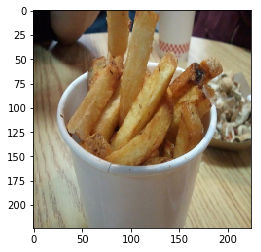

In [11]:
plt.imshow(train_data[1]), print(train_labels[1])

In [12]:
np.count_nonzero(train_labels == 1), np.count_nonzero(train_labels == 0)

(249, 249)

<h2>Data Generator</h2>

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [15]:
datagen.fit(train_data)

<h2>Normalização</h2>

In [16]:
from __future__ import division

In [ ]:
# train_data = train_data / 255
# test_data = test_data / 255

<h2>Modelo CNN</h2>

In [17]:
from keras.models import Model
from keras.layers import *
from keras.applications import MobileNet

In [25]:
model = MobileNet(input_shape=(224, 224, 3), include_top=False)

In [26]:
for l in model.layers:
    l.trainable = False

In [27]:
ultima_camada_treinada = model.output
x = GlobalAveragePooling2D()(ultima_camada_treinada)
x = Dense(1, activation='sigmoid')(x)

In [28]:
modelo_final = Model(model.input, x)

In [29]:
modelo_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [ ]:
# input_node = Input(shape=(224, 224, 3))
# cnn1 = Conv2D(32, (3, 3), padding='same', activation='relu')(input_node)
# pool1 = MaxPooling2D((2, 2), strides=(2, 2))(cnn1)

# cnn2 = Conv2D(64, (3, 3), padding='same', activation='relu')(pool1)
# pool2 = MaxPooling2D((2, 2), strides=(2, 2))(cnn2)

# cnn3 = Conv2D(128, (3, 3), padding='same', activation='relu')(pool2)
# pool3 = MaxPooling2D((2, 2), strides=(2, 2))(cnn3)

# cnn4 = Conv2D(256, (3, 3), padding='same', activation='relu')(pool3)
# pool4 = MaxPooling2D((2, 2), strides=(2, 2))(cnn4)

# cnn5 = Conv2D(512, (3, 3), padding='same', activation='relu')(pool4)
# pool5 = MaxPooling2D((2, 2), strides=(2, 2))(cnn5)

# cnn6 = Conv2D(1024, (3, 3), padding='same', activation='relu')(pool5)
# pool6 = MaxPooling2D((2, 2), strides=(2, 2))(cnn6)

# flat = Flatten()(pool6)
# fc1 = Dense(1024)(flat)
# fc2 = Dense(1024)(fc1)
# output_node = Dense(1, activation='sigmoid')(fc2)

# model = Model(input_node, output_node)
# # model.summary()
# len(model.layers)

In [ ]:
# model.summary()

In [31]:
from keras.optimizers import *
from keras.metrics import *
from keras.callbacks import *

In [ ]:
# Adam(lr=1e-5, )

In [40]:
modelo_final.compile('Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
folder = 'logs/'

if not os.path.isdir(folder):
    os.makedirs(folder)

model_checkpoint = ModelCheckpoint(filepath=folder + 'model.{epoch:02d}-{loss:.2f}-{acc:.2f}-{val_loss:.2f}-{val_acc:.2f}.hdf5', 
                                   verbose=1, 
                                   save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=20)

callbacks = [early_stop, model_checkpoint]

In [44]:
# for l in modelo_final.layers: l.trainable = True

In [43]:
# modelo_final.summary()

In [42]:
epochs = 1000
modelo_final.fit_generator(datagen.flow(train_data, train_labels, batch_size=8),
                            steps_per_epoch=len(train_data) / 8, 
                           epochs=epochs, 
                           callbacks = callbacks, 
                           validation_data=datagen.flow(test_data, test_labels, batch_size=8),
                           validation_steps=len(test_data) / 8)

Epoch 1/1000
63/62 [==============================] - 19s 302ms/step - loss: 1.1036 - acc: 0.6825 - val_loss: 1.2723 - val_acc: 0.6940

Epoch 00001: val_loss did not improve from 0.27327
Epoch 2/1000
63/62 [==============================] - 13s 199ms/step - loss: 0.6928 - acc: 0.7204 - val_loss: 0.7486 - val_acc: 0.6960

Epoch 00002: val_loss did not improve from 0.27327
Epoch 3/1000
63/62 [==============================] - 13s 199ms/step - loss: 0.5077 - acc: 0.7777 - val_loss: 1.2116 - val_acc: 0.6680

Epoch 00003: val_loss did not improve from 0.27327
Epoch 4/1000
63/62 [==============================] - 13s 199ms/step - loss: 0.3621 - acc: 0.8353 - val_loss: 1.0897 - val_acc: 0.7220

Epoch 00004: val_loss did not improve from 0.27327
Epoch 5/1000
63/62 [==============================] - 13s 199ms/step - loss: 0.3811 - acc: 0.8532 - val_loss: 0.6226 - val_acc: 0.8140

Epoch 00005: val_loss did not improve from 0.27327
Epoch 6/1000
63/62 [==============================] - 13s 203ms/s

KeyboardInterrupt: 

In [ ]:
model.evaluate_generator(datagen.flow(test_data, test_labels, batch_size=8))